In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from olist.seller import Seller
from olist.order import Order
from olist.data import Olist
import os
import sys

In [2]:
olist = Olist()

📊 Plot the `residuals` in a histogram.

# Sellers

🎯 Our goal is to find sellers who have repeatedly been underperforming vs. others, and understand why.  
This will help us shape our recommendations about how to improve Olist's profit margin for the future.

❗️ Long Notebook. Once you've read a section, you can collapse it.
<details>
    <summary> <i>[remainder] Notebook best practices</i></summary>

- Code your logic so that your Notebook can always be run from top to bottom without crashing (`Cell --> Run All`)
- Name your variables carefully 
- Use dummy names such as `tmp` for intermediary steps when you know you won't need them later
- Clear your code and merge cells when relevant to minimize Notebook size (`Shift-M`)
- Hide your cell output if you don't need to see it anymore (double click on the red `Out[]:` section to the left of your cell).
- Make heavy use of jupyter nbextention `Collapsable Headings` and `Table of Content` (call a TA if you can't find them)
- Use the following shortcuts 
    - `a` to insert a cell above
    - `b` to insert a cell below
    - `dd` to delete a cell
    - `esc` and `arrows` to move between cells
    - `Shift-Enter` to execute cell and move focus to the next one
    - use `Shift + Tab` when you're between method brackets e.g. `groupby()` to get the docs! Repeat a few times to open it permanently

</details>





## 1 - `olist/seller.py`  

In a process similar to `order.py`, we have coded for you the module `olist/seller.py` containing a class `Seller` with a method `Seller().get_training_data` that will return a DataFrame with the following features:
  
| feature_name 	| type 	| description 	|
|:---	|:---:	|:---	|
| `seller_id` 	| str 	| the id of the seller **UNIQUE** 	|
| `seller_city` 	| str 	| the city where seller is located 	|
| `seller_state` 	| str 	| the state where seller is located 	|
| `delay_to_carrier` 	| float 	| returns 0 if the order is delivered before the shipping_limit_date, otherwise the value of the delay 	|
| `wait_time` 	| float 	| average wait_time (duration of deliveries) per seller 	|
| `date_first_sale` 	| datetime 	| date of the first sale on Olist 	|
| `date_last_sale` 	| datetime 	| date of the last sale on Olist 	|
| `months_on_olist` 	| float 	| round number of months  on Olist	|
| `share_of_five_stars` 	| float 	| share of five-star reviews for orders in which the seller was involved 	|
| `share_of_one_stars` 	| float 	| share of one-star reviews for orders in which the seller was involved 	|
| `review_score` 	| float 	| average review score for orders in which the seller was involved 	|
| `n_orders` 	| int 	| number of unique orders the seller was involved with 	|
| `quantity` 	| int 	| total number of items sold by this seller 	|
| `quantity_per_order` 	| float 	| average number of items per order for this seller 	|
| `sales` 	| float 	| total sales associated with this seller (excluding freight value) in BRL 	|  

❓ **Import your new class below and check out your training dataframe !** Take time to look at the code and understand exactly what has been computed for you

🤔 One last thing remains to be computed for each seller:
* the proportion of extremely high reviews (`share_of_five_stars`) and the proportion of extremely poor reviews (`share_of_one_stars`)
* the (average) `review_score`

😱 Each low-rated order will indeed have a negative impact on Olist's reputation and this is modeled by the `cost_of_review`.  

This will help us compute the total `cost_of_review` per seller later on!

❓ **Implement the last method that has been left for you `get_review_score()`**

In [3]:
# first table - get_review_score from Order, will contain 'order_id', 'dim_is_five_star', 'dim_is_one_star', 'review_score'
review_score_data = Order().get_review_score()

In [4]:
# second table - order_items from data, will contain order_id, seller_id
order_items = Olist().get_data()['order_items']

In [5]:
#merge the three tables: first left join of sellers on seller_items on seller_id, then on reviews on order_id
master_table = order_items.merge(review_score_data,on='order_id')

In [6]:
master_table

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,dim_is_five_star,dim_is_one_star,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1,0,5
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,0,0,4
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1,0,5
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,0,0,4
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1,0,5
...,...,...,...,...,...,...,...,...,...,...
112367,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,1,0,5
112368,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,1,0,5
112369,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,1,0,5
112370,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,1,0,5


In [7]:
seller_avg_score = master_table.groupby('seller_id').agg({'review_score':'mean'})
_ = master_table.merge(seller_avg_score, how='left',on='seller_id')
temp = _.rename(columns={'review_score_y':'review_score'})

In [8]:
# Group by the table by seller_id
# sum the values in dim_is_five_star and in dim_is_one_star + count of review_score
# divide the values in dim_is_five_star and dim_is_one_star by the count of review score

review_score_test = temp.groupby('seller_id').agg({\
                                        'dim_is_five_star': 'sum',\
                                        'dim_is_one_star': 'sum',\
                                        'review_score_x': 'count',\
                                        'review_score':'mean'}).reset_index()
review_score_test['share_of_five_stars'] = review_score_test['dim_is_five_star']/review_score_test['review_score_x']

review_score_test['share_of_one_stars'] = review_score_test['dim_is_one_star']/review_score_test['review_score_x']

In [9]:
review_score = review_score_test.drop(['dim_is_five_star','dim_is_one_star','review_score_x'],axis=1)

order = ['seller_id', 'share_of_five_stars', 'share_of_one_stars', 'review_score']

review_score = review_score[order]

review_score.head()

,seller_id,share_of_five_stars,share_of_one_stars,review_score
0,0015a82c2db000af6aaaf3ae2ecb0532,0.666667,0.333333,3.666667
1,001cca7ae9ae17fb1caed9dfb1094831,0.512712,0.144068,3.902542
2,001e6ad469a905060d959994f1b41e4f,0.000000,1.000000,1.000000
3,002100f778ceb8431b7a1020ff7ab48f,0.553571,0.125000,3.982143
4,003554e2dce176b5555353e4f3555ac8,1.000000,0.000000,5.000000


🧪 Test your code below

In [10]:
from nbresult import ChallengeResult

tmp = Seller().get_training_data()
result = ChallengeResult('seller',
    shape = tmp.shape,
    median = tmp.review_score.median(),
    columns = tmp.columns
)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/dima/.pyenv/versions/3.10.6/envs/lewagon/bin/python
cachedir: .pytest_cache
rootdir: /Users/dima/code/Dimasaur/04-Decision-Science/03-Linear-Regression/data-sellers/tests
plugins: asyncio-0.19.0, typeguard-2.13.3, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 3 items

test_seller.py::TestSeller::test_column_names PASSED                     [ 33%]
test_seller.py::TestSeller::test_median_review_score PASSED              [ 66%]
test_seller.py::TestSeller::test_shape PASSED                            [100%]

============================== 3 passed in 0.29s ===============================


💯 You can commit your code:

git add tests/seller.pickle

git commit -m 'Completed seller step'

git push origin master



💡 **Not getting the exact number of rows?**
<details><summary>Do you have an extra 3 rows?</summary>
Did you do a left or right join? We see why, but here we are only interested in sellers who actually received reviews, and we took an inner join.
</details>
<details><summary>Are you missing 2 rows?</summary>
Did you use <code>Orders().get_training_data()</code>? That's a valid option, but it's a bit overkill if we're only interested in reviews, no? Remember how that method does a lot of calculations. And the number of columns it returns: we don't need most of them. Find another method in the <code>Order</code> class that would be better tailored to what we need.
</details>

## 2 - Sellers' Exploration

### (2.1) Plots

👉 Let's start with some initial ***`EDA - Exploratory Data Analysis`*** about these sellers.

- 📈 Plot the distribution of each numerical variable of the dataset in one large figure
- 👀 Do you notice any outliers?
- What's the median of orders per seller ❓
- How does the distribution of this variable look like ❓

In [ ]:
sellers = Seller().get_training_data()

In [85]:
sellers.shape

(2967, 15)

In [45]:
sellers['n_orders'].median()

7.0

(0.0, 100.0)

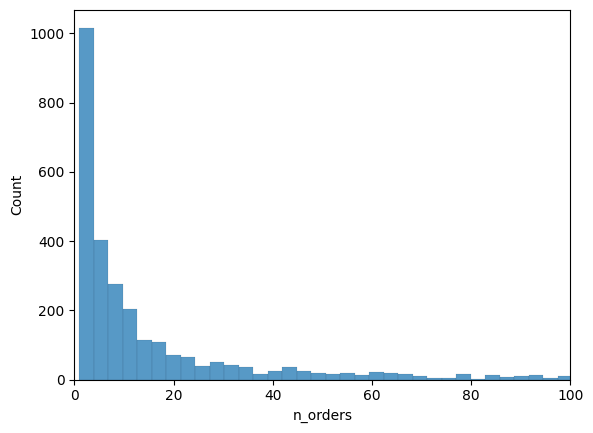

In [48]:
sns.histplot(sellers['n_orders'])
plt.xlim(0,100)

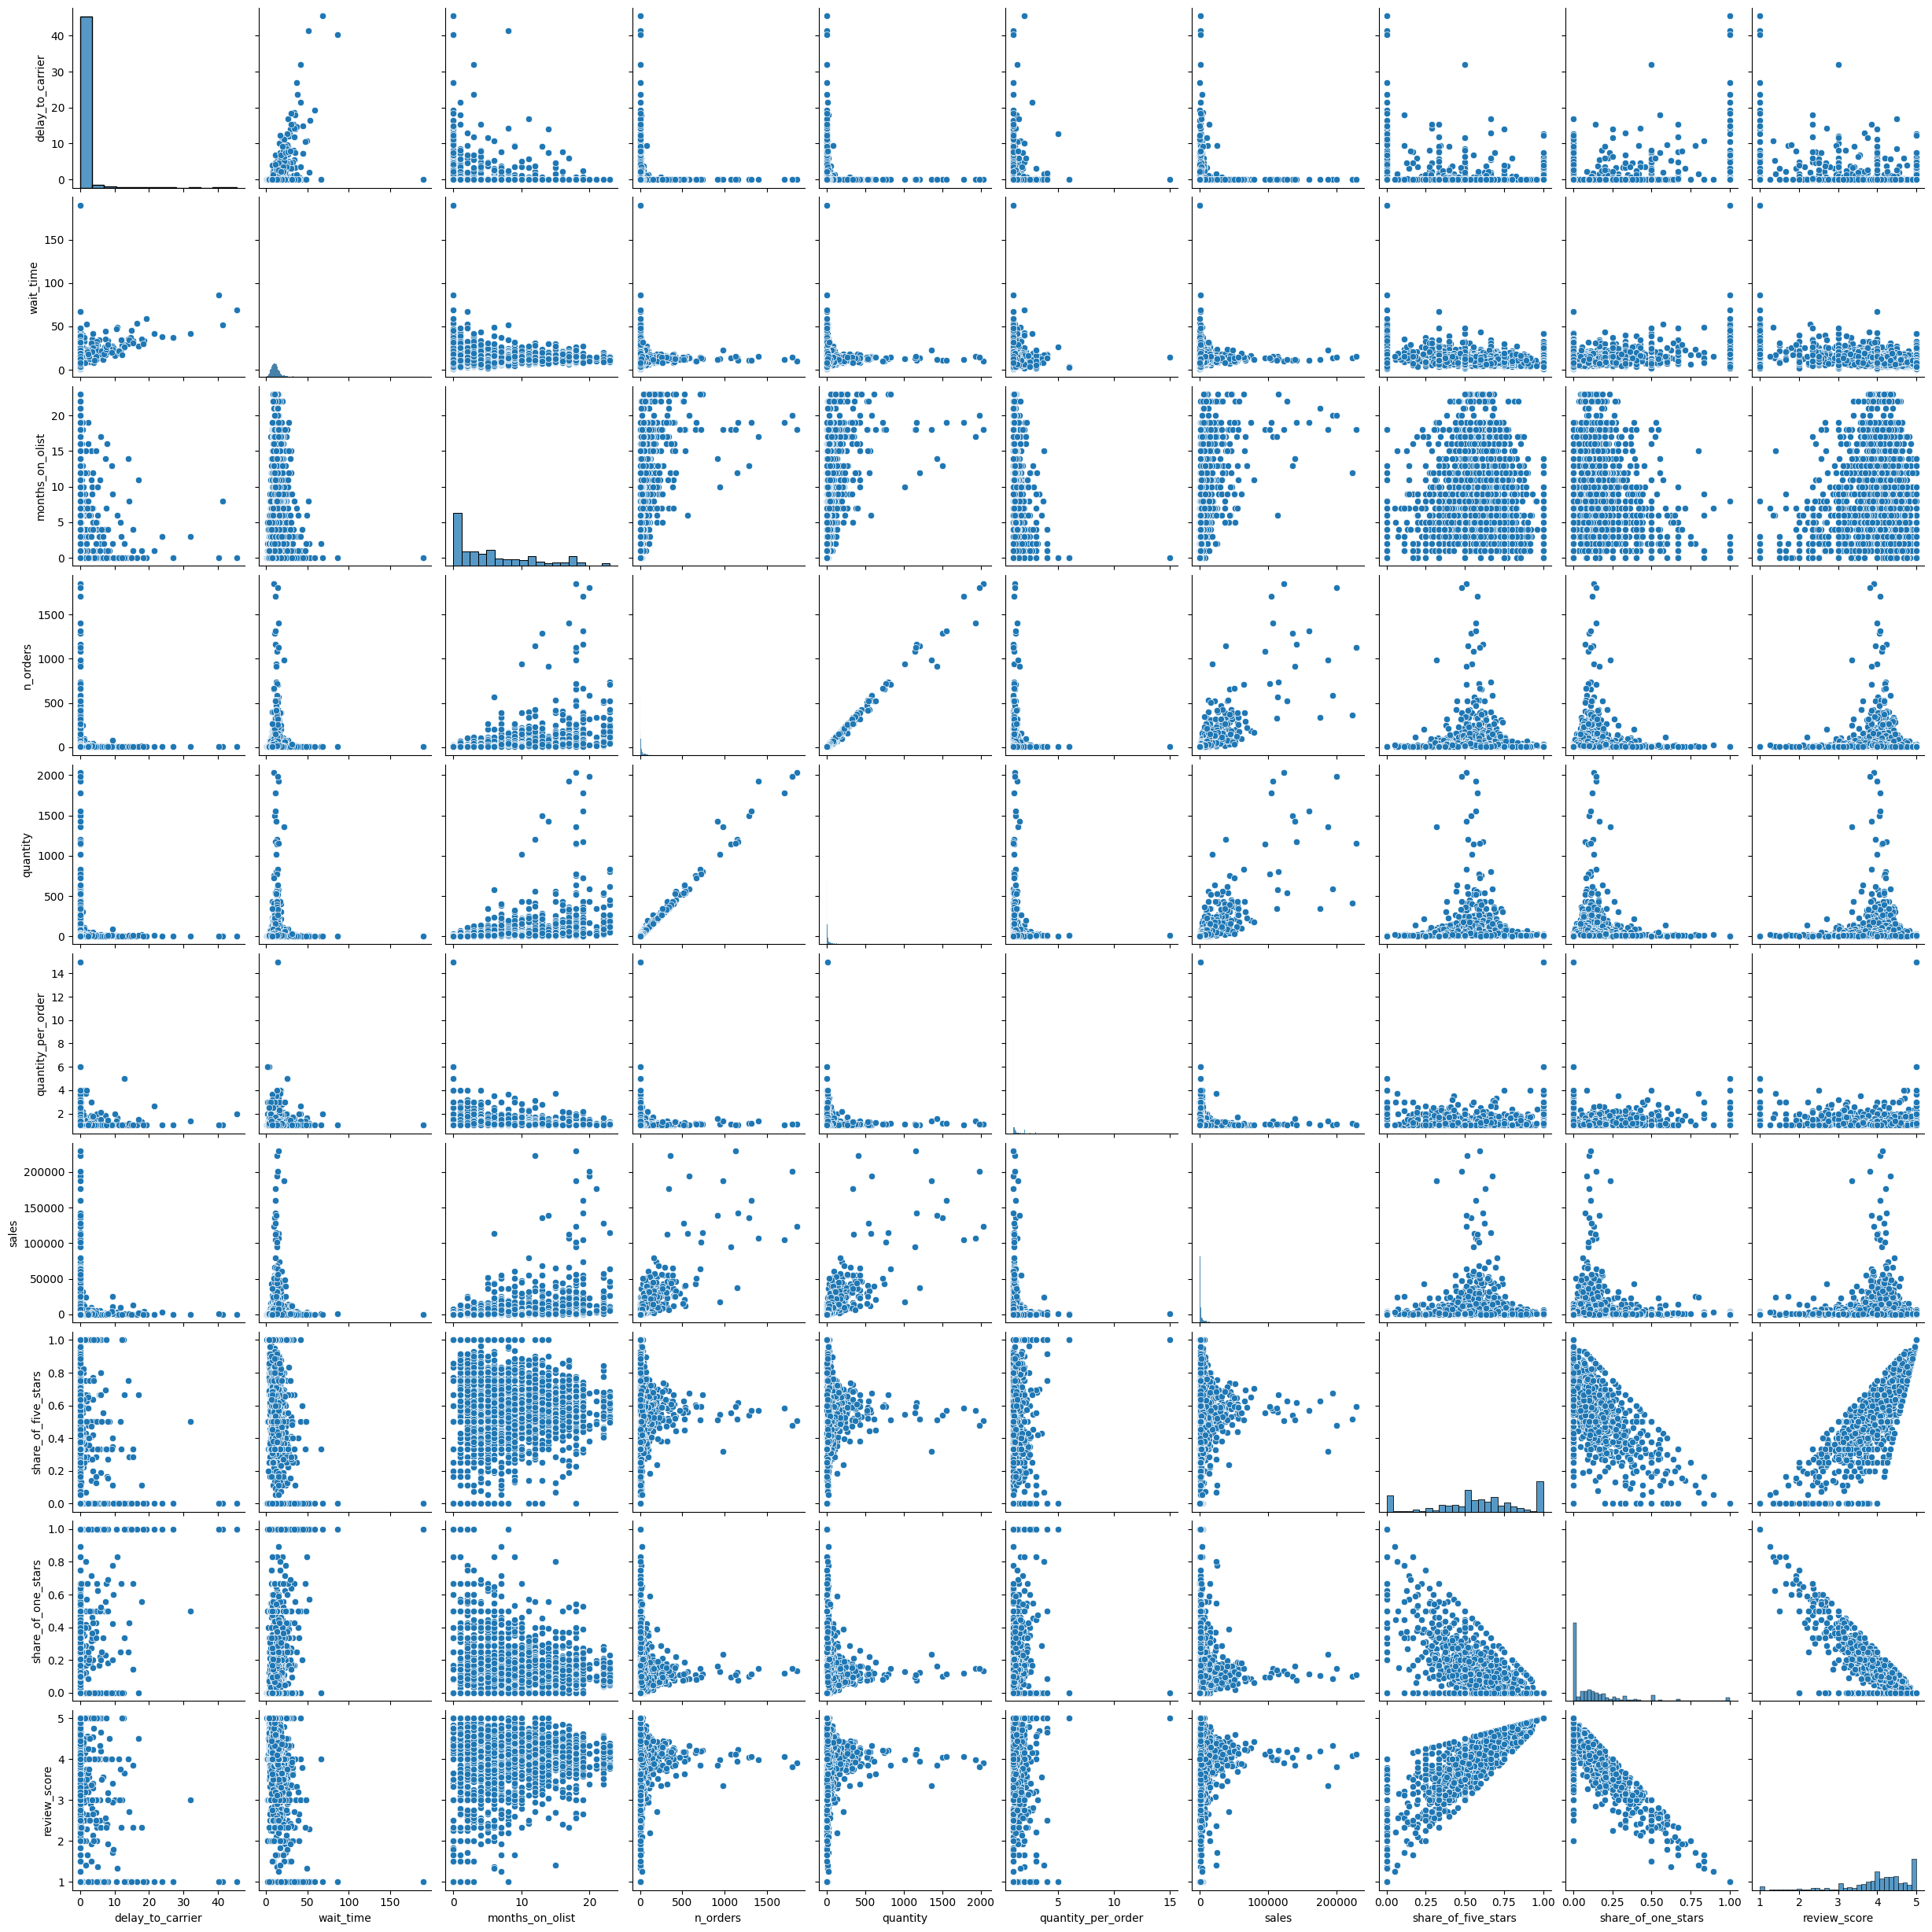

In [42]:
sns.pairplot(sellers)

💡There seems to be a group of sellers which stands out for having very low review scores! 

📊 Let's investigate graphically it:
* Using `plotly`, create a `scatterplot` of `delay_to_carrier` against `wait_time`, varying bubble size by total `sales` for that seller, and coloring by `review_score`. 

In [50]:
import plotly.express as px

In [161]:
figure = px.scatter(y=sellers['delay_to_carrier'],\
                    x=sellers['wait_time'],\
                    size=sellers['sales'],\
                    color=sellers['review_score'],\
                    range_x=[-2,200],\
                    range_y=[-5,40],\
                    size_max=100)

figure

Feel free to change values `x`, `y`, `color` and `size` to try identify who are the worst sellers

### (2.2) Model out `review_score` with OLS

⚠️ Scatter plots have their limits. 

💡 A more rigorous way to explain **`sellers' review_score`** is to **model the impact of various features on `review_score` with a `multivariate-OLS` in `statsmodels`**.

👉 Create an OLS with numerical features of your choice. 

❓ What are the most impactful ones? 

⚠️ Don't forget to standardize your features using the `standardize`function below to compare the regression coefficients together. 

In [183]:
features_temp = list(sellers.columns)

features = ['delay_to_carrier', 'wait_time', 'n_orders', 'quantity', 'quantity_per_order', 'sales']


In [184]:

def standardize(df, features):
    df_standardized = df.copy()
    for f in features:
        mu = df[f].mean()
        sigma = df[f].std()
        df_standardized[f] = df[f].map(lambda x: (x - mu) / sigma)
    return df_standardized


In [185]:
sellers_standardized = standardize(sellers,features)

In [186]:
for i in features:
    print(i)

delay_to_carrier
wait_time
n_orders
quantity
quantity_per_order
sales


In [187]:
model1 = smf.ols(formula='review_score ~ delay_to_carrier\
                                        + wait_time\
                                        + n_orders\
                                        + quantity\
                                        + quantity_per_order\
                                        + sales'\
                                        ,data=sellers_standardized).fit()

In [191]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           review_score   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.185
Method:                 Least Squares   F-statistic:                     113.4
Date:                Wed, 24 Jul 2024   Prob (F-statistic):          4.42e-129
Time:                        20:53:09   Log-Likelihood:                -3329.4
No. Observations:                2967   AIC:                             6673.
Df Residuals:                    2960   BIC:                             6715.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.0749      0.014    298.308      0.000       4.048       4.102
delay_to_carrier      -0.1149      0.015     -7.423      0.000      -0.145      -0.085
wait_time             -0.2790      0.015    -18.033      0.000      -0.309      -0.249
n_orders               0.1830      0.122      1.499      0.134      -0.056       0.422
quantity              -0.2027      0.121     -1.674      0.094      -0.440       0.035
quantity_per_order    -0.0658      0.014     -4.748      0.000      -0.093      -0.039
sales                  0.0101      0.023      0.446      0.656      -0.034       0.055
==============================================================================
Omnibus:                      713.346   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2123.627
Skew:                          -1.230   Prob(JB):                         0.00
Kurtosis:                       6.335   Cond. No.                         20.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

📊 Draw a `bar_plot` with sorted coefficients.

In [192]:
params_df = pd.DataFrame(model1.params,columns=['Values'])
params_df.index.name = 'Parameters'

<AxesSubplot:ylabel='Parameters'>

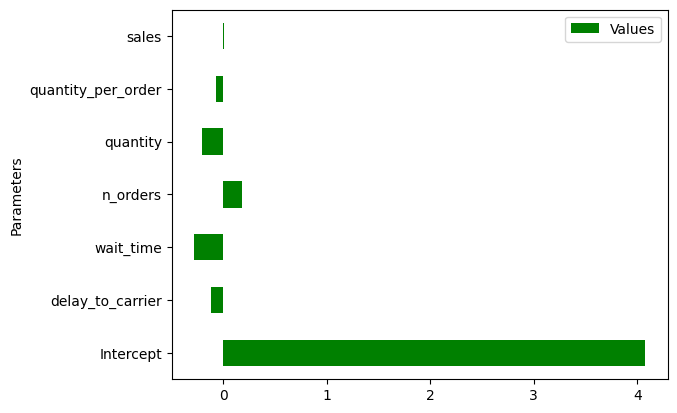

In [193]:
params_df.plot(kind='barh',color='green')

👉 Finally, investigate your model's performance (`R-squared`) and `residuals`

In [194]:
predict_features = model1.predict(sellers_standardized[features])
predict_features

0       4.085842
1       4.246085
2       4.439952
3       4.375773
4       3.038051
          ...   
2962    4.274699
2963    4.085522
2964    4.431005
2965    4.275978
2966    4.275794
Length: 2967, dtype: float64

👉 Compare the real review scores and the predicted scores by showing them on the same graph.

In [195]:
residuals = predict_features - sellers_standardized['review_score']
residuals

0       1.085842
1      -0.314890
2      -0.560048
3      -0.624227
4       2.038051
          ...   
2962   -0.725301
2963   -0.014478
2964   -0.568995
2965   -0.178567
2966    0.275794
Length: 2967, dtype: float64

👉 Plot the residuals

(-3.0, 3.0)

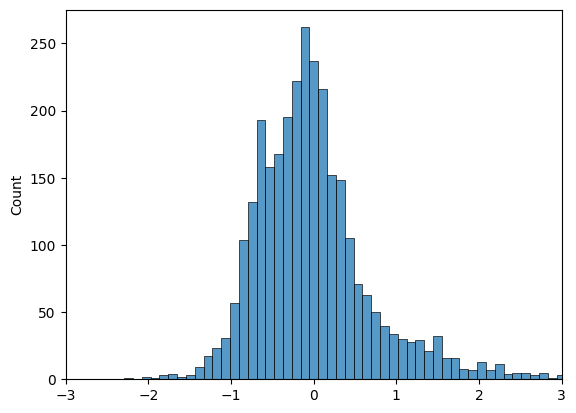

In [200]:
sns.histplot(residuals)
plt.xlim(-3,3)

### (2.3) Add the `seller_state` to your analysis

❓ We haven't used information about `seller_state` yet.  
- Create a new OLS model regressing `review_score` on only on `seller_states` .
- Analyse your significant features using `return_significative_coef(model)` coded for you in `olist/utils.py`
- What are the best states in terms of `review_score`? 

<details>
    <summary>- Hints -</summary>
        
⚠️ Be careful, `seller_state` is a categorical feature. 
    
💡 Use `C(a_cat_feature)` in the formula to tell the linear regression model which variables are categorical variables. It will create one boolean variable `is_cat_feature_xx` **per unique category** 

</details>

In [201]:
model2 = smf.ols(formula='review_score ~ C(seller_state)',data=sellers_standardized).fit()

from olist.utils import return_significative_coef

return_significative_coef(model2).tail()

,variable,p_value,coef
12,C(seller_state)[T.PE],0.041382,1.773696
1,C(seller_state)[T.BA],0.036514,1.772447
15,C(seller_state)[T.RJ],0.036379,1.731710
21,C(seller_state)[T.SP],0.037823,1.713781
3,C(seller_state)[T.DF],0.043756,1.690972


☝️ Some states indeed have _significantly_ better reviews than others on average. 

🤔 Is it due to some lower `quantity_per_order`, lower `wait_time`, or `delay_to_carrier`?  Or is it due to some other factors that we haven't collected data about?

❓ **Try to isolate the impact of the `seller_state` from the rest by adding other continuous features to your OLS until `seller_states` is no longer statistically siginificant!**

In [202]:
model3 = smf.ols(formula='review_score ~ quantity_per_order + sales + quantity + C(seller_state)',data=sellers_standardized).fit()

return_significative_coef(model3).head()

,variable,p_value,coef
0,Intercept,0.005082,2.303470
16,C(seller_state)[T.RN],0.016280,2.163358
4,C(seller_state)[T.ES],0.013824,2.069100
8,C(seller_state)[T.MS],0.029710,1.957293
11,C(seller_state)[T.PB],0.027844,1.952623


In [206]:
model4 = smf.ols(formula='review_score ~ wait_time + C(seller_state)',data=sellers_standardized).fit()

return_significative_coef(model4).head(10)

,variable,p_value,coef
0,Intercept,1.023268e-07,4.038599
22,wait_time,1.479050e-117,-0.337660


☝️ After adding `wait_time` to our analysis, none of the 22 dummy variables `is_seller_state_xx` are statistically signigicant:

Given our small dataset (most states have a very limited number of sellers):
- We _cannot conclude_ that "some states are inherently better than other for reasons that would be independent of the `wait_time`" 
- In other words, we _cannot reject the hypothesis_ that "seller_state has no impact on review_score, other than through `wait_time`"

🏁 Congratulations!

💾 Commit and push :
* your ` sellers.ipynb`notebook 
* as well as `seller.py`